In [1]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from ggplot import *

import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import sys
sys.path.append('../MLRecipes')
#import ml_helper as mlhelp
import pickle
import random
import warnings
warnings.filterwarnings("ignore")

/home/ADEKUNLE/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

/home/ADEKUNLE/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

/home/ADEKUNLE/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
def find_features(words):
    """Takes as input a list of tokenized words and outputs features"""
    features = {}
    for w in word_features:
        features[w] = (w in words) # the dict has the word as key and boolean as value
    return features

def classify_list(classifier, token_list):
    """Get predicted label from classifier"""
    values = []
    for nested_list in token_list:
        value = classifier.classify(find_features(nested_list))
        values.append(value)
    return values

In [3]:
originals_df = open("orginalTweetDF.pickle", "rb")
originals = pickle.load(originals_df)
originals_df.close()

originals.head()

,Unnamed: 0,datetime,is_reply,is_retweet,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,...,AuburnAlabama,justAuburn,justAlabama,link,tweet_tokens,AlabamaToken,AuburnToken,lower_tweet_tokens,lower_AlabamaToken,lower_AuburnToken
0,1,2017-08-25 02:26:56,False,False,3,0,3,Auburn University has asked fans not to roll t...,/AUFootball2017/status/900907315397873664,816450392720547841,...,False,True,False,,"[Auburn, University, has, asked, fans, not, to...",,"[Auburn, University, has, asked, fans, not, to...","[auburn, university, has, asked, fans, not, to...",[],"[auburn, university, has, asked, fans, not, to..."
1,2,2017-10-08 15:55:37,False,False,0,0,0,SULONEN: Silence speaks volumes for #Auburnfoo...,/dbbmonica/status/917055892125650944,2603224578,...,False,True,False,,"[SULONEN, :, Silence, speaks, volumes, for, #A...",,"[SULONEN, :, Silence, speaks, volumes, for, #A...","[sulonen, :, silence, speaks, volumes, for, #a...",[],"[sulonen, :, silence, speaks, volumes, for, #a..."
2,3,2016-04-09 20:41:47,False,False,3,0,0,My horse all-in to first place #Jovon referen...,/AlKotero/status/718901745640837120,1437203700,...,False,True,False,,"[My, horse, all-in, to, first, place, #Jovon, ...",,"[My, horse, all-in, to, first, place, #Jovon, ...","[my, horse, all-in, to, first, place, #jovon, ...",[],"[my, horse, all-in, to, first, place, #jovon, ..."
3,4,2016-09-03 21:58:59,False,False,0,0,0,Best time of the year! #gameday #auburnfootba...,/bradcampbell29/status/772192190634295297,41000950,...,False,True,False,https://www.,"[Best, time, of, the, year, !, #gameday, #aubu...",,"[Best, time, of, the, year, !, #gameday, #aubu...","[best, time, of, the, year, !, #gameday, #aubu...",[],"[best, time, of, the, year, !, #gameday, #aubu..."
4,5,2017-09-16 22:37:29,False,False,1,0,0,"Gus Malzahn era: 2013-September 16, 2017. #RIP...",/harrison_helton/status/909184492803420160,705528705116971009,...,False,True,False,,"[Gus, Malzahn, era, :, 2013, -, September, 16,...",,"[Gus, Malzahn, era, :, 2013, -, September, 16,...","[gus, malzahn, era, :, 2013, -, september, 16,...",[],"[gus, malzahn, era, :, 2013, -, september, 16,..."


In [4]:
import glob

path =r'tokens/neg/' # use your path
allFiles = glob.glob(path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles[:500]:
    import codecs
    with codecs.open(file_, "r",encoding='utf-8', errors='ignore') as fdata:
        df = pd.read_csv(fdata)
        list_.append(df)
frame = pd.concat(list_)

In [5]:
frame.shape

(0, 18411)

In [6]:
data = frame.transpose()

data.to_csv("neg.csv", index_label=True)

In [7]:
data = pd.read_csv("neg.csv")

data['label'] = 'neg'

data.columns = ['review', 'label']

In [8]:
data.head()

,review,label
0,review by ed johnson-ott,neg
1,""" "" a christmas story",neg
2,""" "" a clockwork orange",neg
3,""" "" a time to kill",neg
4,""" "" alien",neg


In [9]:
#Positive
import glob

path =r'tokens/pos/' # use your path
allFiles = glob.glob(path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles[:500]:
    import codecs
    with codecs.open(file_, "r",encoding='utf-8', errors='ignore') as fdata:
        df = pd.read_csv(fdata)
        list_.append(df)
frame = pd.concat(list_)

In [10]:
frame.shape

(0, 21724)

In [11]:
dataPos = frame.transpose()

dataPos.to_csv("pos.csv", index_label=True)

In [12]:
dataPos = pd.read_csv("pos.csv")

dataPos['label'] = 'pos'

dataPos.columns = ['review', 'label']

In [13]:
dataPos.head()

,review,label
0,.,pos
1,will hunting ( matt damon ) is a natural gen...,pos
2,""" "" a life less ordinary "" . . . )",pos
3,""" "" aliens "" and "" the empire strikes back . ...",pos
4,""" "" broadcast news "" and the notorious "" i'll...",pos


In [14]:
documents = []
posDoc = list(zip(dataPos.review, dataPos.label))
negDoc = list(zip(data.review, data.label))

In [15]:
documents =  documents + posDoc + negDoc

In [16]:
len(documents)

40133

In [17]:
?word_tokenize

Signature: word_tokenize(text, language='english', preserve_line=False)
Docstring:
Return a tokenized copy of *text*,
using NLTK's recommended word tokenizer
(currently an improved :class:`.TreebankWordTokenizer`
along with :class:`.PunktSentenceTokenizer`
for the specified language).

:param text: text to split into words
:param text: str
:param language: the model name in the Punkt corpus
:type language: str
:param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
:type preserver_line: bool
File:      ~/anaconda3/lib/python3.6/site-packages/nltk/tokenize/__init__.py
Type:      function


In [18]:
wordPos = open("pos.csv","r").read()
wordNeg = open("neg.csv", "r").read()

In [19]:
allWords = []
WordPos = word_tokenize(wordPos)
WordNeg = word_tokenize(wordNeg)

for w in WordPos:
    allWords.append(w.lower())
    
for w in WordNeg:
    allWords.append(w.lower())

In [20]:
getAllWords = nltk.FreqDist(allWords)

word_features = list(getAllWords.keys())[:10000]

featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [21]:
random.shuffle(featuresets)

In [22]:
len(featuresets) #DataSet hs 40133, let's do train 30,000, test 10133

40133

In [23]:
training_set = featuresets[:30000]
testing_set = featuresets[30000:]

In [24]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)

BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)

<SklearnClassifier(BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))>

In [25]:
LR_classifier = SklearnClassifier(LinearSVC())
LR_classifier.train(training_set)

SVM_classifier = SklearnClassifier(LogisticRegression())
SVM_classifier.train(training_set)

<SklearnClassifier(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))>

Print Classifier Accuracy

In [26]:
print("NLTK Naive Bayes algorithm accuracy percent: ", (nltk.classify.accuracy(classifier, testing_set))*100)
print("Multinomial Naive Bayes accuracy percent:",(nltk.classify.accuracy(MNB_classifier, testing_set))*100)
print("Bernoulli Naive Bayes accuracy percent:",(nltk.classify.accuracy(BNB_classifier, testing_set))*100)
print("Logistic Regression accuracy percent:",(nltk.classify.accuracy(LR_classifier, testing_set))*100)
print("SVM accuracy percent:",(nltk.classify.accuracy(SVM_classifier, testing_set))*100)

NLTK Naive Bayes algorithm accuracy percent:  61.896772920161844
Multinomial Naive Bayes accuracy percent: 61.77834797197276
Bernoulli Naive Bayes accuracy percent: 61.54149807559459
Logistic Regression accuracy percent: 61.44281061877035
SVM accuracy percent: 62.17309779926972


In [70]:
classifier.show_most_informative_features(20)

Most Informative Features
                 flubber = True              neg : pos    =     16.2 : 1.0
               gladiator = True              pos : neg    =     14.9 : 1.0
                  winter = True              pos : neg    =     13.8 : 1.0
                 bateman = True              pos : neg    =     13.3 : 1.0
                 chicken = True              pos : neg    =     13.0 : 1.0
                   whale = True              pos : neg    =     12.7 : 1.0
                  welles = True              neg : pos    =     10.6 : 1.0
                    alas = True              neg : pos    =     10.2 : 1.0
                scarlett = True              pos : neg    =      9.3 : 1.0
                      23 = True              neg : pos    =      9.1 : 1.0
                  blonde = True              neg : pos    =      8.7 : 1.0
                 stanton = True              pos : neg    =      8.7 : 1.0
                   skull = True              neg : pos    =      8.3 : 1.0

Use Classifier to Make Prediction

In [27]:
auburnTokenList = originals['lower_AuburnToken'].tolist()
alabamaTokenList = originals['lower_AlabamaToken'].tolist()

In [30]:
len(auburnList), len(alabamaList)

(3718, 675)

In [29]:
#Get rid of empties
auburnList = [x for x in auburnTokenList if x !=[]]
alabamaList = [x for x in alabamaTokenList if x !=[]]

In [31]:
#Let's do prediction on 500
auburnL = auburnList[0:2000]
alabamaL = alabamaList[0:650]

In [32]:
MNBAuburn = classify_list(MNB_classifier, auburnL)
MNBAlabama = classify_list(MNB_classifier, alabamaL)

BNBAuburn = classify_list(BNB_classifier, auburnL)
BNAlabama = classify_list(BNB_classifier, alabamaL)

LRAuburn = classify_list(LR_classifier, auburnL)
LRAlabama = classify_list(LR_classifier, alabamaL)

SVMAuburn = classify_list(SVM_classifier, auburnL)
SVMAlabama = classify_list(SVM_classifier, alabamaL)

In [97]:
# allAuburnPos = pd.Series([MNBAuburn.count('pos'), BNBAuburn.count('pos'), LRAuburn('pos'), SVMAuburn.count('pos')])

# allAuburnNeg = pd.Series([MNBAuburn.count('neg'), BNBAuburn.count('neg'), LRAuburn.count('neg'), SVMAuburn.count('neg')])

# allAlabamaPos = pd.Series([MNBAlabama.count('pos'), BNAlabama.count('pos'), LRAlabama('pos'), SVMAlabama('pos')])

# allAlabamaNeg = pd.Series([MNBAlabama.count('neg'), BNAlabama.count('neg'), LRAlabama.count('neg'), SVMAlabama.count('neg')])

In [33]:
def getCounts(listAlgo, toCheck):
    list_ = []
    for i in listAlgo:
        val = i.count(toCheck)
        list_.append(val)
    return list_

#getCounts([BNAlabama], 'pos')

In [34]:
auburnAlg = [MNBAuburn, BNBAuburn, LRAuburn, SVMAuburn]
allAuburnPos = pd.Series(getCounts(auburnAlg, 'pos'))
allAuburnNeg = pd.Series(getCounts(auburnAlg, 'neg'))

alabamaAlg = [MNBAlabama, BNAlabama, LRAlabama, SVMAlabama]
allAlabamaPos = pd.Series(getCounts(alabamaAlg, 'pos'))
allAlabamaNeg = pd.Series(getCounts(alabamaAlg, 'neg'))

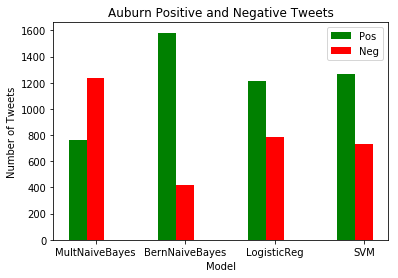

In [35]:
multiple_bars=plt.figure()
x=['MultNaiveBayes', 'BernNaiveBayes', 'LogisticReg', 'SVM']
ind=np.arange(len(x))
pos = allAuburnPos
neg = allAuburnNeg

ax=plt.subplot(111)
ax.set_title("Auburn Positive and Negative Tweets")
ax.bar(ind-.2, pos, width=.2, color='g', align='center', label='Pos')
ax.bar(ind, neg, width=.2, color='r', align='center', label='Neg')

ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Model')
ax.legend(loc='best')
plt.savefig("Auburn.png")
plt.show()

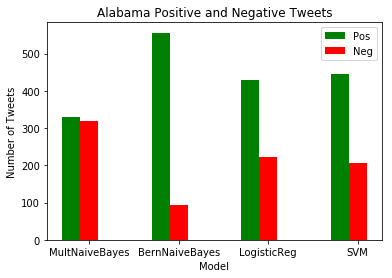

In [36]:
multiple_bars=plt.figure()
x=['MultNaiveBayes', 'BernNaiveBayes', 'LogisticReg', 'SVM']
ind=np.arange(len(x))
pos = allAlabamaPos
neg = allAlabamaNeg

ax=plt.subplot(111)
ax.set_title("Alabama Positive and Negative Tweets")
ax.bar(ind-.2, pos, width=.2, color='g', align='center', label='Pos')
ax.bar(ind, neg, width=.2, color='r', align='center', label='Neg')

ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Model')
ax.legend(loc='best')
plt.savefig("Alabama.png")
plt.show()

In [37]:
print("Percent negative MNB classifier:",(MNBAuburn.count('neg')/len(MNBAuburn)*100))
print("Percent negative BNB classifier:",(BNBAuburn.count('neg')/len(BNBAuburn)*100))
print("Percent negative LR classifier:",(LRAuburn.count('neg')/len(LRAuburn)*100))
print("Percent negative SVM classifier:",(SVMAuburn.count('neg')/len(SVMAuburn)*100))

Percent negative MNB classifier: 61.85000000000001
Percent negative BNB classifier: 20.849999999999998
Percent negative LR classifier: 39.300000000000004
Percent negative SVM classifier: 36.6


In [38]:
print("Percent negative MNB classifier:",(MNBAlabama.count('neg')/len(MNBAlabama)*100))
print("Percent negative BNB classifier:",(BNAlabama.count('neg')/len(BNAlabama)*100))
print("Percent negative LR classifier:",(LRAlabama.count('neg')/len(LRAlabama)*100))
print("Percent negative SVM classifier:",(SVMAlabama.count('neg')/len(SVMAlabama)*100))

Percent negative MNB classifier: 49.23076923076923
Percent negative BNB classifier: 14.461538461538462
Percent negative LR classifier: 34.15384615384615
Percent negative SVM classifier: 31.538461538461537
